<a href="https://colab.research.google.com/github/elsaabs/dement_invasion/blob/main/Google_Colaboratory_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install pickle5

In [1]:
pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install --no-cache-dir libpysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install esda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Mount drive

In [4]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.

In [5]:
cd drive/MyDrive/'Michaeline Elsa - Invasion project'/'21.05.01 - Jupyter notebooks'/'Round #6'/

/content/drive/MyDrive/Michaeline Elsa - Invasion project/21.05.01 - Jupyter notebooks/Round #6


# Import Libraries

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import pickle5
import matplotlib.pyplot as plt
#import output_CNP
import matplotlib as mpl      # for colormap on barplots
from sklearn.decomposition import PCA

# Figure 3a

In [7]:
# BUILD DATA TABLE
# Table phase 1
phase1 = pd.read_csv('decay_results_persubstrate_combined_22032001.csv')
# Table phase 2
phase21 = pd.read_csv('decay_results_persubstrate_combined_22032003.csv')
phase22 = pd.read_csv('decay_results_persubstrate_combined_22031801.csv')
phase2 = pd.concat([phase21,phase22])
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enz_max"] == 3)  & (phase1['substrate'] == 'Hemicellulose')]
phase2_DtoPo  = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResA') & (phase2["substrate"] == 'Hemicellulose')]
phase2_PotoD  = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResB') & (phase2["substrate"] == 'Hemicellulose')]
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'C']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'E']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
col6 = phase2_DtoPo.loc[phase2_DtoPo['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D to Sc"})
col7 = phase2_PotoD.loc[phase2_PotoD['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc to D"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

,D-P1,Sc-P1,G-P1,Po-P1,Sa-P1,D to Sc,Sc to D
0,0.000045,0.000009,0.000000,0.000305,0.000579,0.000052,0.000000
1,0.000003,0.001307,0.001217,0.001271,0.000003,0.000117,0.000777
2,0.000003,0.000620,0.000503,0.000000,0.000066,0.000000,0.000003
3,0.000000,0.000129,0.000493,0.000078,0.000080,0.034745,0.000015
4,0.000008,0.000148,0.000127,0.000311,0.000000,0.000044,0.000004
5,0.000006,0.000651,0.000448,0.000003,0.001264,0.000006,0.000008
6,0.000008,0.001323,0.001016,0.000476,0.000335,0.000043,0.000000
7,0.000003,0.000000,0.000006,0.000060,0.000445,0.000466,0.000028
8,0.000097,0.000197,0.000097,0.000041,0.000303,0.000164,0.000001
9,0.000000,0.000653,0.000143,0.000398,0.000080,0.000000,0.000001


[(0.0, 0.0015)]

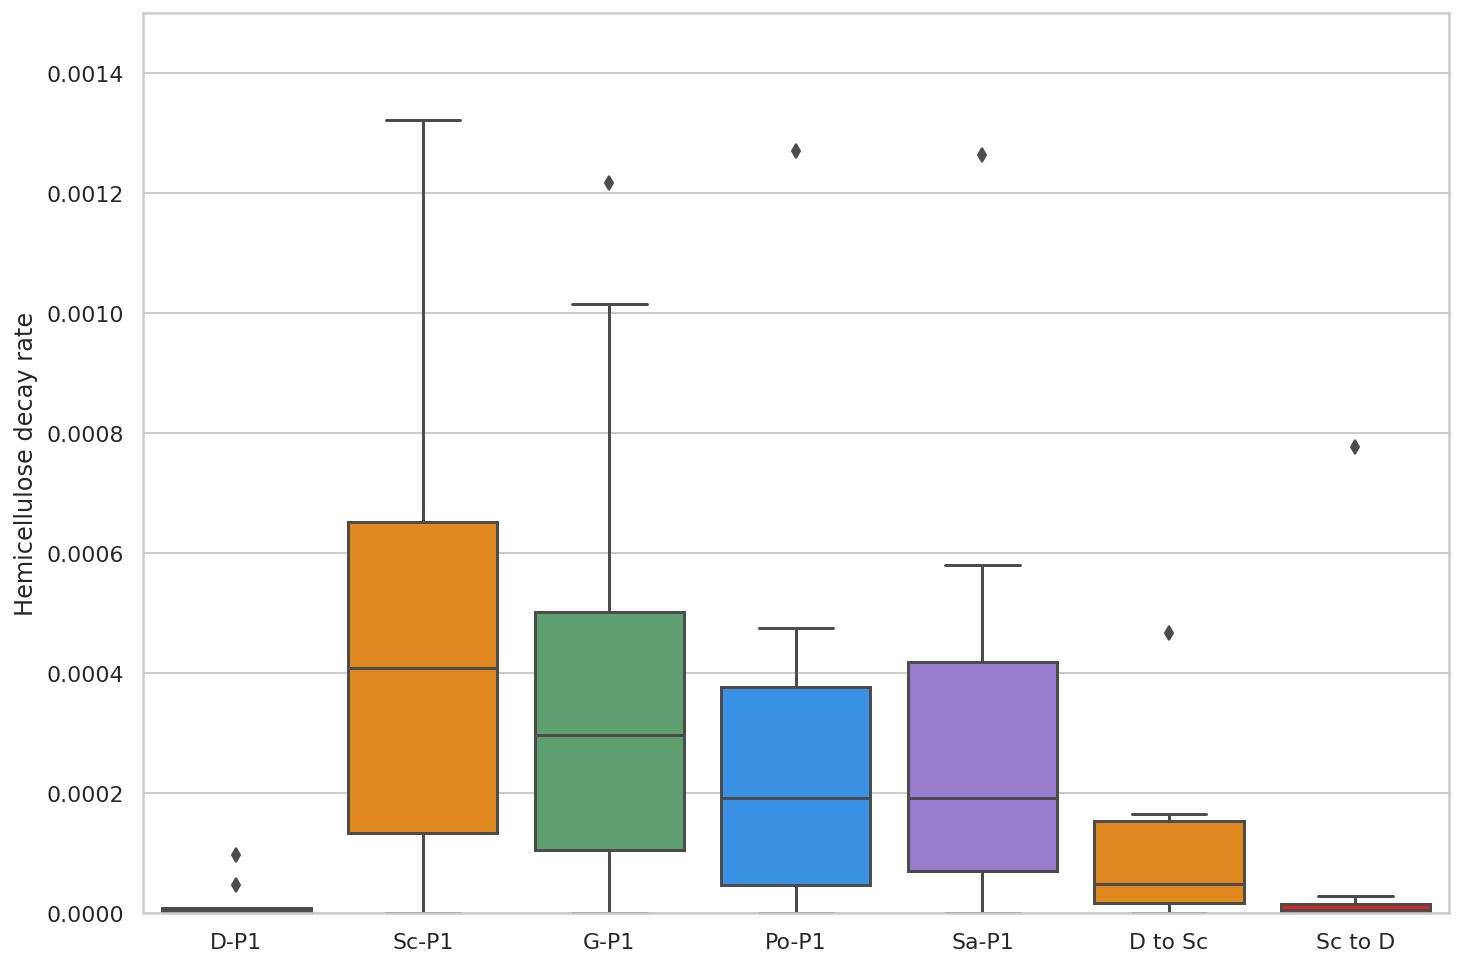

In [8]:
# BOXPLOT
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "D to Sc":"darkorange", "Sc to D":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax.set_ylabel('Hemicellulose decay rate')
ax.set_xlabel('')
ax.set(ylim=(0, 1.5e-3))

In [34]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[1],anov_df_T[5]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

             sum_sq    df         F   PR(>F)
treatment  0.000047   1.0  0.778507  0.38923
Residual   0.001083  18.0       NaN      NaN


In [27]:
anov_df

,decay,treatment,seed
0,0.000000,G-P1,1
1,0.001217,G-P1,2
2,0.000503,G-P1,3
3,0.000493,G-P1,4
4,0.000127,G-P1,5
5,0.000448,G-P1,6
6,0.001016,G-P1,7
7,0.000006,G-P1,8
8,0.000097,G-P1,9
9,0.000143,G-P1,10


# Figure 3b

In [25]:
# BUILD DATA TABLE
# t0 (= final day of P1)
table_t0 = pd.read_csv('specialists_phase1_t0_combined_22032201.csv')
table_t0_N = table_t0[(table_t0["substrate"] == 'Hemicellulose')]
# year 3 of phase 1
table_LC = pd.read_csv('specialists_year3_combined_22032201.csv')
table_LC_N = table_LC[(table_LC["substrate"] == 'Hemicellulose')]
# t0 of phase 2
table_tII0 = pd.read_csv('specialists_t0_combined_22032202.csv')
table_tII0_N = table_tII0[(table_tII0["substrate"] == 'Hemicellulose') & (table_tII0["invaders"] == 'NoInv')]
# year 3 of phase 2 NoInv
table_LCII = pd.read_csv('specialists_year3_combined_22032202.csv')
table_LCII_N = table_LCII[(table_LCII["substrate"] == 'Hemicellulose') & (table_LCII["invaders"] == 'NoInv')]
# Build dataframe
col0 = table_t0_N.loc[(table_t0_N['litter'] == 'A')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "PI-t0"})
col1 = table_LC_N.loc[(table_LC_N['litter'] == 'A')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D-P1"})
col2 = table_LC_N.loc[(table_LC_N['litter'] == 'B')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sc-P1"})
col3 = table_LC_N.loc[(table_LC_N['litter'] == 'C')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "G-P1"})
col4 = table_LC_N.loc[(table_LC_N['litter'] == 'D')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Po-P1"})
col5 = table_LC_N.loc[(table_LC_N['litter'] == 'E')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sa-P1"})
col6 = table_LCII_N.loc[(table_LCII_N['final_litter'] == 'B') & (table_LCII_N['residents'] == 'ResA')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D to Sc"})
col7 = table_LCII_N.loc[(table_LCII_N['final_litter'] == 'A') & (table_LCII_N['residents'] == 'ResB')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sc to D"})
Table_for_plot = pd.concat([col0,col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

,PI-t0,D-P1,Sc-P1,G-P1,Po-P1,Sa-P1,D to Sc,Sc to D
0,102.0,820.365401,393.178077,203.619523,342.650540,729.721226,9982.162330,44.318205
1,225.0,24.255720,437.859281,655.085407,0.000000,441.252940,257.051543,249.600439
2,0.0,47.099981,563.672373,143.913490,303.733704,350.821686,463.083103,67.859951
3,401.0,364.946586,507.131750,4.975646,65.923994,102.620133,121.781969,212.704827
4,283.0,83.208194,135.554243,0.000000,2.418026,153.643357,6.709786,4150.019325
5,325.0,96.521569,413.157198,490.878497,649.833647,607.902988,77.231516,0.000000
6,170.0,0.000000,192.535098,372.781957,309.430672,327.824876,64.481843,26.927300
7,565.0,506.630147,691.108178,423.025095,132.687122,0.000000,0.000000,0.000000
8,537.0,44.274583,0.000000,492.211796,759.308768,351.511244,0.000000,8.518250
9,330.0,0.000000,6.858587,460.901419,393.986432,2.979474,110.216557,447.891367


[(0.0, 800.0)]

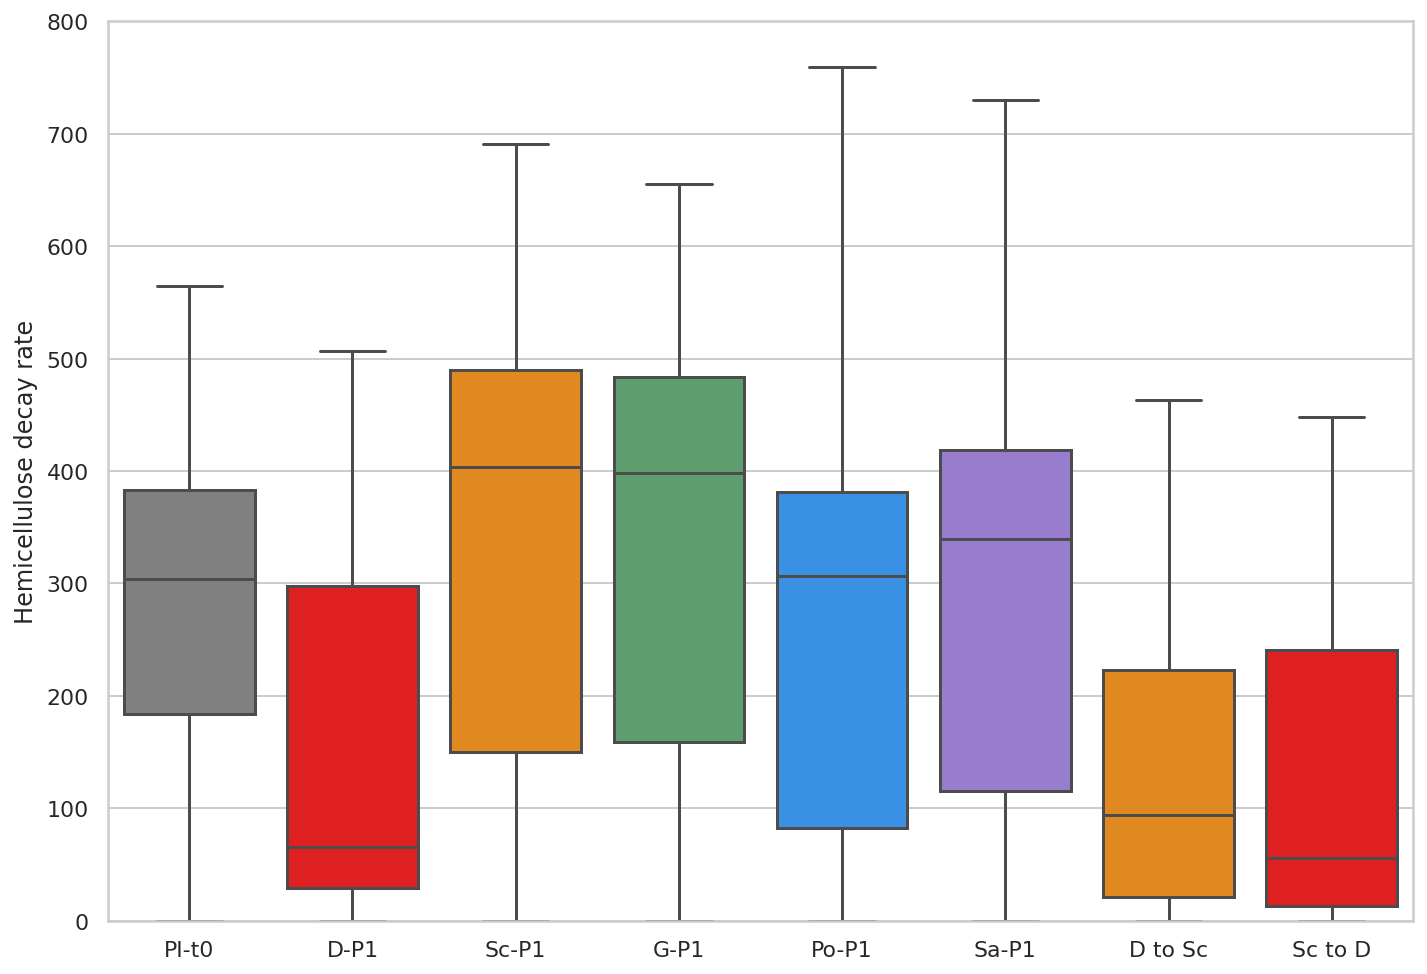

In [26]:
# BOXPLOT
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"PI-t0":"grey",
          "D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "D to Sc":"darkorange", "Sc to D":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax.set_ylabel('Hemicellulose decay rate')
ax.set_xlabel('')
ax.set(ylim=(0, 800))

In [27]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "biomass"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[1]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('biomass ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  9.163231e+04   1.0  1.377118  0.255887
Residual   1.197705e+06  18.0       NaN       NaN


# Figure 3c

In [28]:
# BUILD DATA TABLE
# Table phase 1
phase1 = pd.read_csv('decay_results_persubstrate_combined_22032001.csv')
# Table phase 2
phase2 = pd.read_csv('decay_results_persubstrate_combined_22032202.csv')
#phase2 = pd.read_csv('decay_results_persubstrate_combined_22031801.csv')
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1['substrate'] == 'Protein3')]
phase2_DtoPo  = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResA') & (phase2["substrate"] == 'Protein3')]
phase2_PotoD  = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResD') & (phase2["substrate"] == 'Protein3')]
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'C']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'E']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
col6 = phase2_DtoPo.loc[phase2_DtoPo['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D to Po"})
col7 = phase2_PotoD.loc[phase2_PotoD['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po to D"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

,D-P1,Sc-P1,G-P1,Po-P1,Sa-P1,D to Po,Po to D
0,0.000040,0.001183,0.000149,3.733497e-07,0.000017,0.000004,0.000005
1,0.000308,0.000165,0.000337,3.909262e-05,0.000019,0.000172,0.000000
2,0.000278,0.000052,0.000066,7.372810e-06,0.000026,0.000000,0.000021
3,0.000668,0.000424,0.000013,6.098432e-06,0.000051,0.000034,0.000023
4,0.000176,0.000364,0.000299,2.698138e-06,0.000014,0.000017,0.000011
5,0.000249,0.000069,0.000051,4.435630e-06,0.000095,0.000005,0.000000
6,0.000015,0.000363,0.000161,8.036740e-06,0.000002,0.000002,0.000506
7,0.000039,0.000152,0.000682,2.257519e-05,0.000010,0.000006,0.000060
8,0.000458,0.000255,0.000321,1.006006e-05,0.000005,0.000009,0.000013
9,0.000126,0.000014,0.000343,6.743813e-06,0.000010,0.000002,0.000018


[(0.0, 0.0007)]

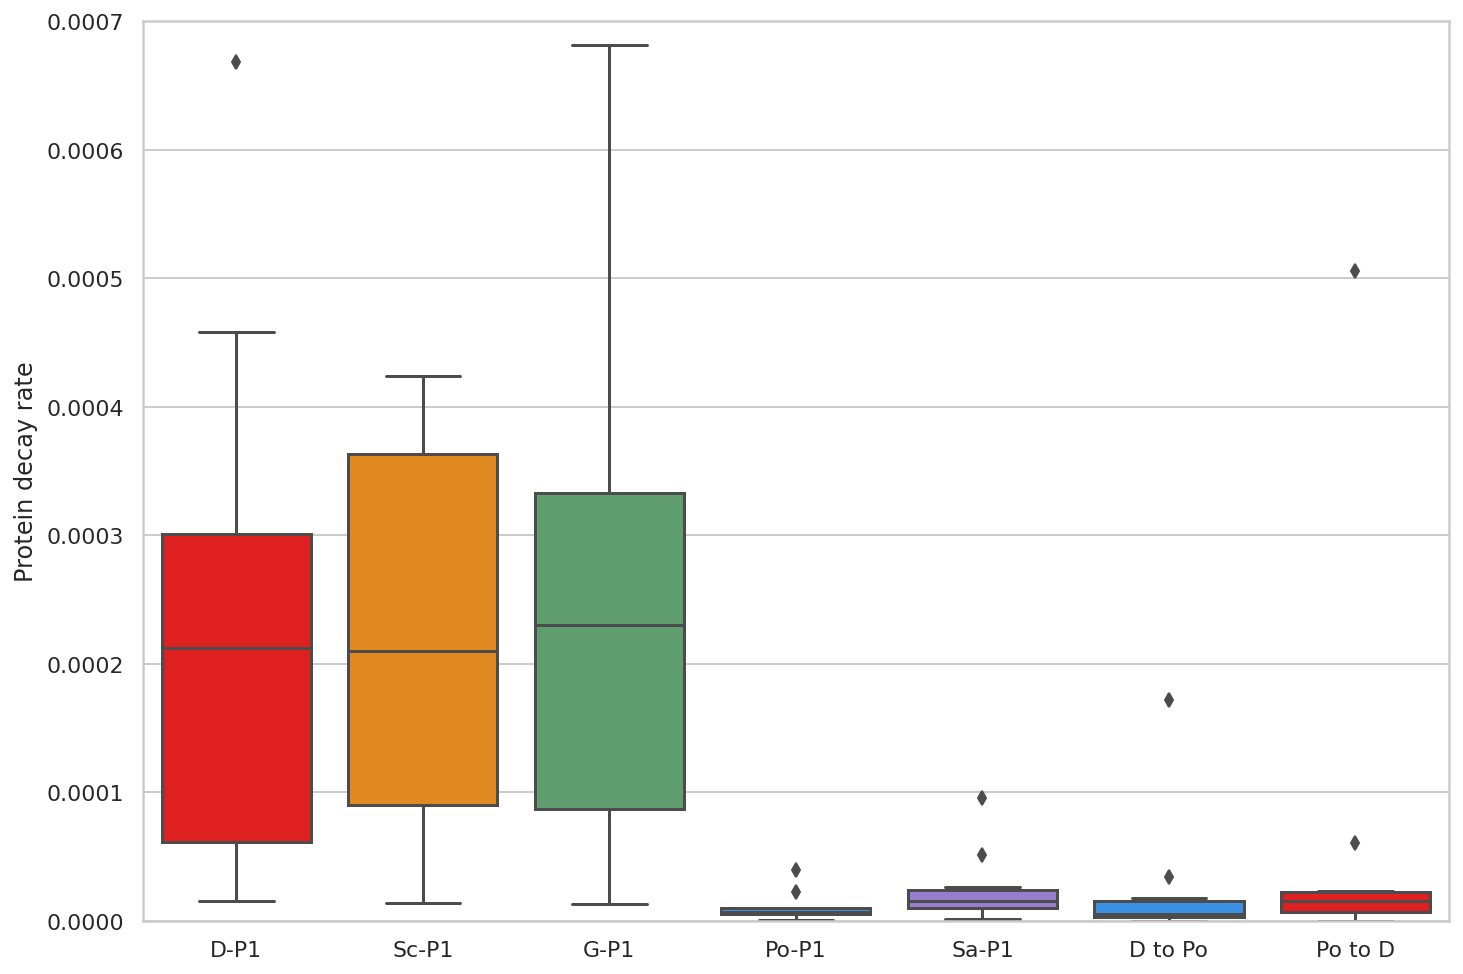

In [29]:
# BOXPLOT
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "D to Po":"dodgerblue", "Po to D":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax.set_ylabel('Protein decay rate')
ax.set_xlabel('')
ax.set(ylim=(0, 0.0007))

In [30]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[1]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  2.331658e-08   1.0  0.294012  0.594311
Residual   1.427489e-06  18.0       NaN       NaN


# Figure 3d

In [31]:
# BUILD DATA TABLE
# t0 (= final day of P1)
table_t0 = pd.read_csv('specialists_phase1_t0_combined_22032201.csv')
table_t0_N = table_t0[(table_t0["substrate"] == 'Protein3')]
# year 3 of phase 1
table_LC = pd.read_csv('specialists_year3_combined_22032201.csv')
table_LC_N = table_LC[(table_LC["substrate"] == 'Protein3')]
# t0 of phase 2
table_tII0 = pd.read_csv('specialists_t0_combined_22032202.csv')
table_tII0_N = table_tII0[(table_tII0["substrate"] == 'Protein3') & (table_tII0["invaders"] == 'NoInv')]
# year 3 of phase 2 NoInv
table_LCII = pd.read_csv('specialists_year3_combined_22032202.csv')
table_LCII_N = table_LCII[(table_LCII["substrate"] == 'Protein3') & (table_LCII["invaders"] == 'NoInv')]
# Build dataframe
col1 = table_t0_N.loc[(table_t0_N['litter'] == 'A')]["biomass_decomp_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_t0": "PI-t0"})
col2 = table_LC_N.loc[(table_LC_N['litter'] == 'A')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "D-P1"})
col3 = table_LC_N.loc[(table_LC_N['litter'] == 'B')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sc-P1"})
col4 = table_LC_N.loc[(table_LC_N['litter'] == 'C')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "G-P1"})
col5 = table_LC_N.loc[(table_LC_N['litter'] == 'D')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Po-P1"})
col6 = table_LC_N.loc[(table_LC_N['litter'] == 'E')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "Sa-P1"})
col7 = table_LCII_N.loc[(table_LCII_N['final_litter'] == 'D') & (table_LCII_N['residents'] == 'ResA')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "DtoPo-y3"})
col8 = table_LCII_N.loc[(table_LCII_N['final_litter'] == 'A') & (table_LCII_N['residents'] == 'ResD')]["biomass_specialist_year"].to_frame().reset_index(drop=True).rename(columns={"biomass_specialist_year": "PotoD-y3"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8],axis=1)
Table_for_plot

,PI-t0,D-P1,Sc-P1,G-P1,Po-P1,Sa-P1,DtoPo-y3,PotoD-y3
0,100.0,316.929200,225.071207,223.000802,71.233671,80.403390,38.812211,123.487520
1,107.0,505.670731,795.430795,443.456739,233.934009,198.894116,34.923754,121.874773
2,368.0,441.688744,231.264099,219.764280,140.721399,94.065983,0.000000,860.387821
3,355.0,200.165306,593.175897,546.453102,10.665469,29.956401,143.428697,47.524482
4,444.0,199.862611,288.638116,43.274157,53.597267,156.382378,46.462058,6.651696
5,368.0,328.455589,45.365810,343.856428,168.778375,59.889102,164.734011,48.580810
6,201.0,26.647713,385.419931,278.530068,31.862463,175.194306,966.855246,147.183631
7,437.0,326.175018,363.695665,75.329722,204.723037,359.592511,67.603172,37.032206
8,438.0,798.473262,76.529068,482.611139,0.808667,2.213014,31.965854,0.000000
9,203.0,91.573872,578.814699,328.216309,77.890022,53.431720,25.695269,0.000000


Text(0.5, 0, '')

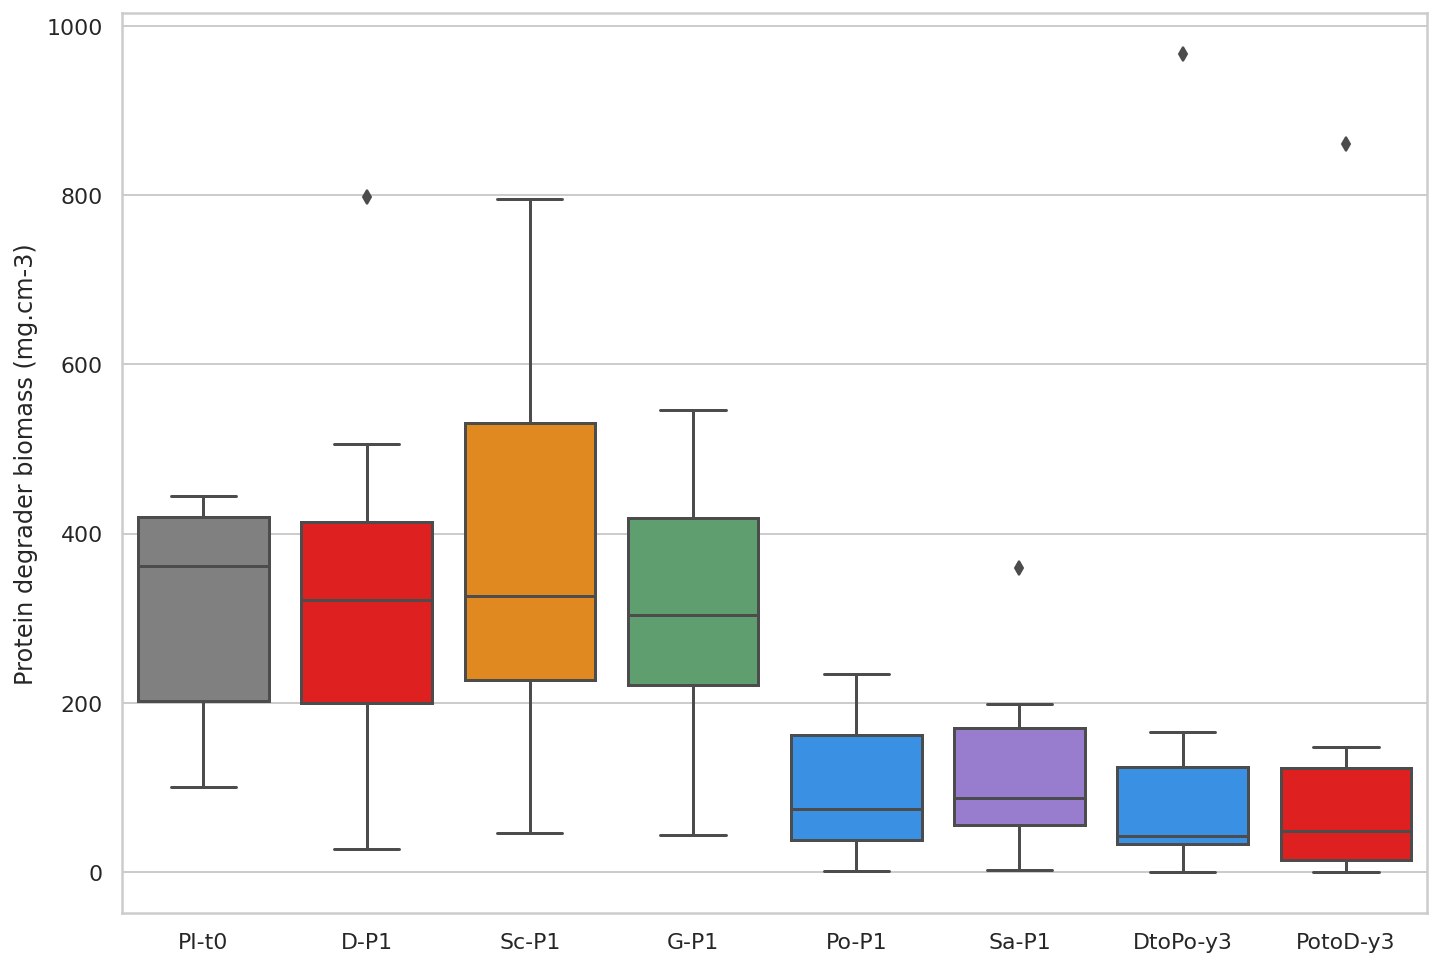

In [32]:
# BOXPLOT
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"PI-t0":"grey",
          "D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "DtoPo-y3":"dodgerblue","PotoD-y3":"red"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax.set_ylabel('Protein degrader biomass (mg.cm-3)')
ax.set_xlabel('')

In [34]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "biomass"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[1]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('biomass ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                  sum_sq    df         F   PR(>F)
treatment    2303.560454   1.0  0.067699  0.79767
Residual   612474.761658  18.0       NaN      NaN


# Figure 4a

In [35]:
# BUILD DATA TABLE
# Table phase 1
phase1 = pd.read_csv('decay_results_persubstrate_combined_22032001.csv')
# Table phase 2
phase2 = pd.read_csv('decay_results_persubstrate_combined_22032202.csv')
# Pick substrate
phase1_enzmax3 = phase1.loc[(phase1["enz_max"] == 3)  & (phase1['substrate'] == 'Protein3')]
phase2_enzmax3  = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResD') & (phase2["substrate"] == 'Protein3')]
# Boxplots for hypothesis 1
import seaborn as sns
# Build dataframe
col1 = phase1_enzmax3.loc[phase1_enzmax3['final_litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'NoInv']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "NoInv"})
col3 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvA']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-D"})
col4 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvB']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-Sc"})
col5 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvC']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-G"})
col6 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvD']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-Po"})
col7 = phase2_enzmax3.loc[phase2_enzmax3['invaders'] == 'InvE']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Inv-Sa"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
Table_for_plot

,D-P1,NoInv,Inv-D,Inv-Sc,Inv-G,Inv-Po,Inv-Sa
0,3.733497e-07,0.000005,0.001009,7.220034e-07,1.533392e-03,0.000000,0.000010
1,3.909262e-05,0.000000,0.000022,1.251623e-03,4.233130e-05,0.000000,0.000020
2,7.372810e-06,0.000021,0.000042,5.092803e-05,1.388732e-05,0.000007,0.000034
3,6.098432e-06,0.000023,0.000047,3.274359e-05,7.983636e-04,0.000113,0.000014
4,2.698138e-06,0.000011,0.001230,1.803868e-04,7.036141e-05,0.000014,0.000000
5,4.435630e-06,0.000000,0.000000,9.997644e-04,3.650331e-05,0.000026,0.000029
6,8.036740e-06,0.000506,0.001346,1.059074e-05,4.093488e-05,0.000029,0.000158
7,2.257519e-05,0.000060,0.000075,7.861069e-05,9.485531e-07,0.000019,0.000000
8,1.006006e-05,0.000013,0.000176,6.261689e-05,1.182035e-04,0.000641,0.000018
9,6.743813e-06,0.000018,0.000014,3.108330e-03,9.607652e-04,0.000019,0.000789


[(0.0, 0.0014)]

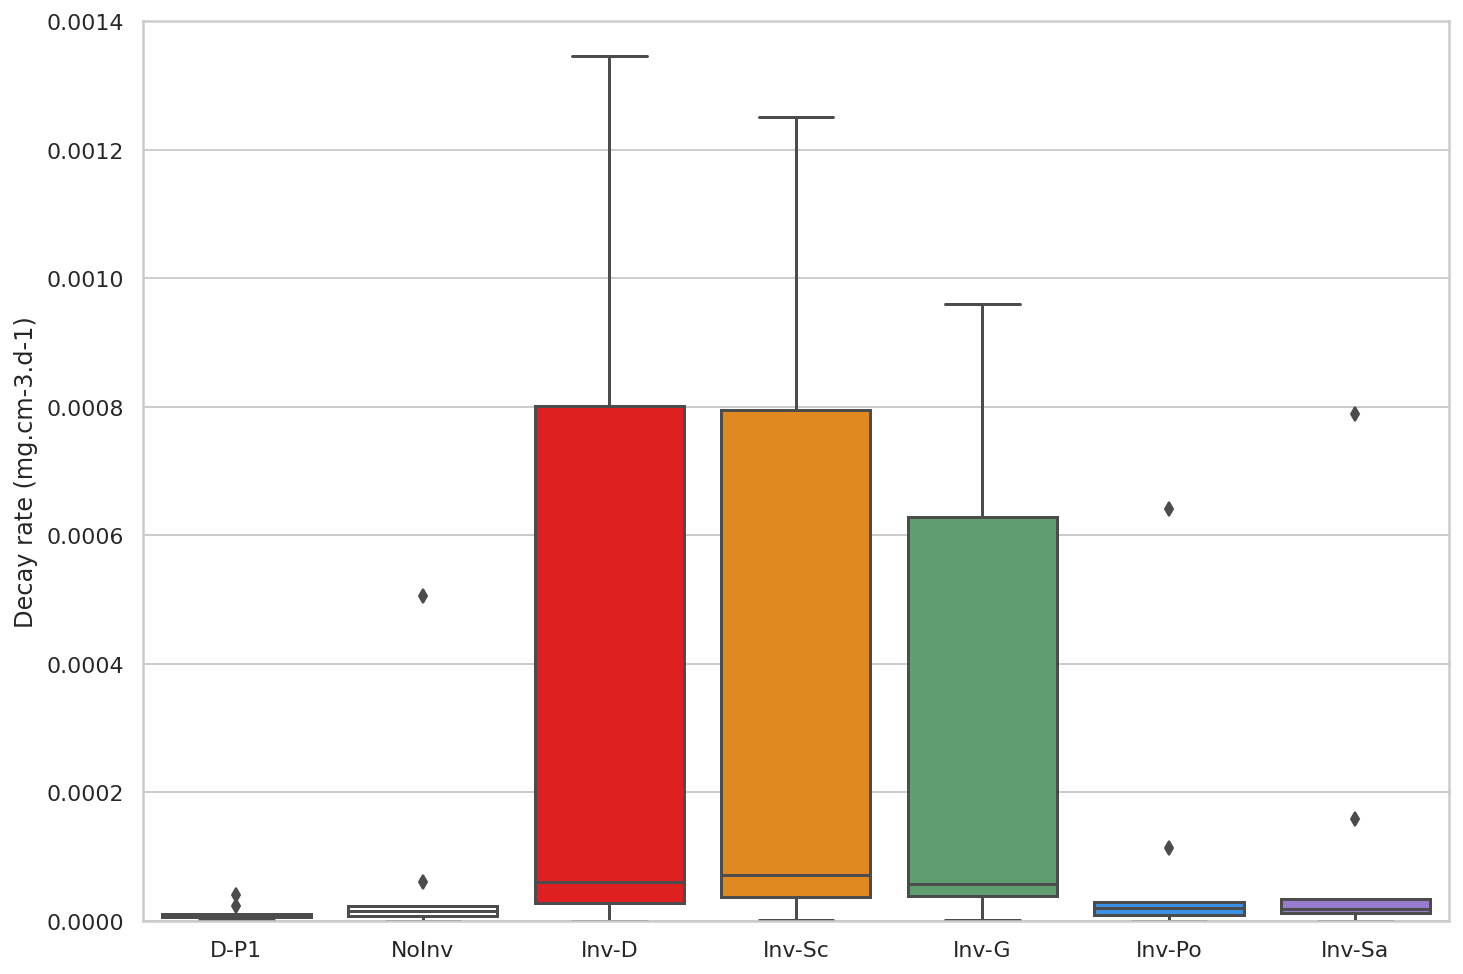

In [36]:
# BOXPLOT
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "NoInv":"w",  "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g",
          "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax.set_ylabel('Decay rate (mg.cm-3.d-1)')
ax.set_xlabel('')
ax.set(ylim=(0, 0.0014))

In [38]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[2],anov_df_T[4]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                 sum_sq    df         F    PR(>F)
treatment  5.965042e-09   1.0  0.019723  0.889872
Residual   5.443872e-06  18.0       NaN       NaN


# Figure 4b

In [38]:
# BUILD DATA TABLE
# t0
table_t0 = pd.read_csv('specialists_t0_combined_22032202.csv')
table_t0_N = table_t0[(table_t0["final_litter"] == 'A') & (table_t0["residents"] == 'ResD') & (table_t0["substrate"] == 'Protein3')]
# Build dataframe
col1 = table_t0_N.loc[(table_t0_N['invaders'] == 'NoInv')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "NoInv"})
col2 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvA')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-D"})
col3 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvB')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-Sc"})
col4 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvC')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-G"})
col5 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvD')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-Po"})
col6 = table_t0_N.loc[(table_t0_N['invaders'] == 'InvE')]["biomass_decomp_inv_t0"].to_frame().reset_index(drop=True).rename(columns={"biomass_decomp_inv_t0": "Inv-Sa"})
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6],axis=1)
Table_for_plot['NoInv'] = Table_for_plot['NoInv'].fillna(0)
Table_for_plot

,NoInv,Inv-D,Inv-Sc,Inv-G,Inv-Po,Inv-Sa
0,0.0,450.835621,125.469575,145.637927,5.678174,18.326145
1,0.0,5.652159,512.305700,304.685470,43.521194,16.294454
2,0.0,67.076423,70.180088,262.087731,8.908363,180.908640
3,0.0,224.750645,294.045775,126.419869,23.465852,75.579932
4,0.0,247.667978,13.941868,34.619619,56.755694,6.054286
5,0.0,217.525073,34.541768,52.943914,118.324979,0.000000
6,0.0,42.431986,131.383778,14.093486,0.000000,116.996109
7,0.0,152.168636,224.249290,46.765344,1.040773,0.000000
8,0.0,7.098205,23.261376,94.829518,14.799191,26.653994
9,0.0,113.705093,323.408696,234.130020,104.349366,18.912590


Text(0.5, 0, '')

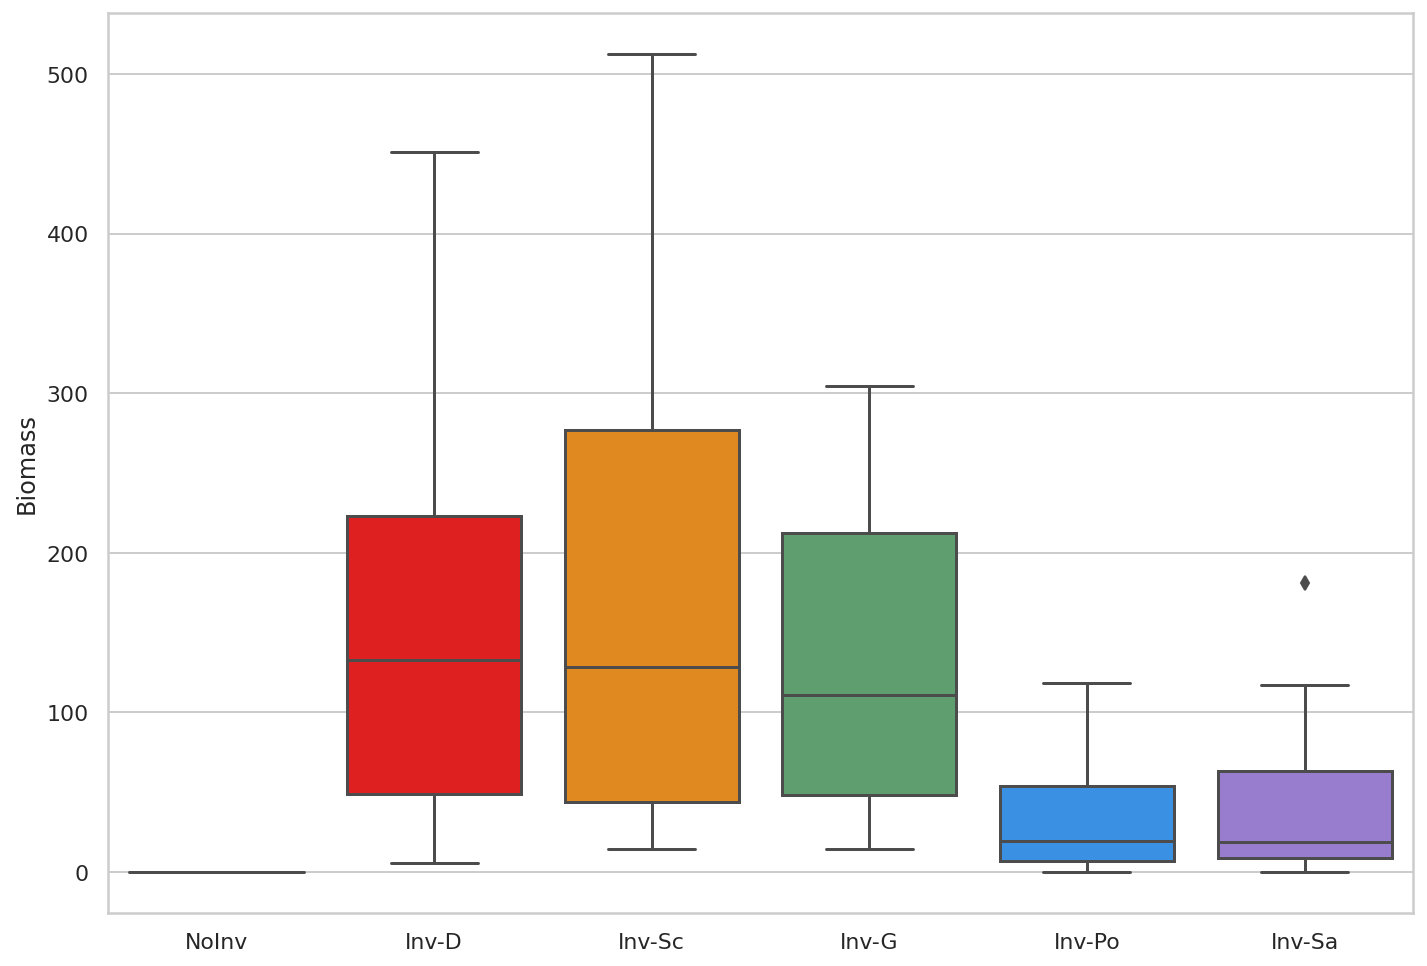

In [40]:
# BOXPLOT
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

my_pal = {"NoInv":"w", "Inv-D":"red", "Inv-Sc":"darkorange", "Inv-G":"g",
          "Inv-Po":"dodgerblue", "Inv-Sa":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax.set_ylabel('Biomass')
ax.set_xlabel('')

In [41]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[1]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

                  sum_sq    df          F    PR(>F)
treatment  116878.567514   1.0  12.293571  0.002522
Residual   171131.252433  18.0        NaN       NaN


# Figure 5a

In [42]:
# BUILD DATA TABLE
# BETWEEN YEAR 3 AND DAY 0
# ALL TOGETHER
table_phase1_t0 = pd.read_csv('specialists_t0_combined_22040201.csv')
table_phase1_year1 = pd.read_csv('specialists_year1_combined_22040201.csv')
table_phase1_year2 = pd.read_csv('specialists_year2_combined_22040201.csv')
table_phase1_year3 = pd.read_csv('specialists_year3_combined_22040201.csv')
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22032203.csv')
table_phase2_year1 = pd.read_csv('specialists_year1_combined_22032203.csv')
table_phase2_year2 = pd.read_csv('specialists_year2_combined_22032203.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
table_phase1_t0_Ntot0 = pd.read_csv('specialists_t0_combined_22040801.csv')
table_phase2_t0_Ntot0 = pd.read_csv('specialists_t0_combined_22040802.csv')
table_phase2_t0_2_Ntot0 = pd.read_csv('specialists_t0_combined_22040803.csv')
# PHASE 1
# RANDOM COMMUNITIES IN DESERT LITTER 
col10 = table_phase1_t0.loc[(table_phase1_t0["substrate"] == 'Protein3') & (table_phase1_t0["litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col10.set_index(['treatment_name'], inplace=True) 
col1 = col10.rename(columns={"biomass_decomp_t0": "N0"})
col20 = table_phase1_year3.loc[(table_phase1_year3["substrate"] == 'Protein3')& (table_phase1_year3["litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col20.set_index(['treatment_name'], inplace=True) 
col2 = col20.rename(columns={"biomass_specialist_year": "Nmean"})
col30 = table_phase1_t0_Ntot0.loc[(table_phase1_t0_Ntot0["substrate"] == 'Protein3') & (table_phase1_t0_Ntot0["litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col30.set_index(['treatment_name'], inplace=True) 
col3 = col30.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_1 = pd.concat([col1['N0'], col2['Nmean'], col3['Ntot0']], axis=1)
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# NO INVADERS
col40 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResD') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col40.set_index(['treatment_name'], inplace=True) 
col4 = col40.rename(columns={"biomass_decomp_t0": "N0"})
col50 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResD') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col50.set_index(['treatment_name'], inplace=True) 
col5 = col50.rename(columns={"biomass_specialist_year": "Nmean"})
col60 = table_phase2_t0_Ntot0.loc[(table_phase2_t0_Ntot0["substrate"] == 'Protein3') & (table_phase2_t0_Ntot0["residents"] == 'ResD') & (table_phase2_t0_Ntot0["invaders"] == 'NoInv') & (table_phase2_t0_Ntot0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col60.set_index(['treatment_name'], inplace=True) 
col6 = col60.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_2 = pd.concat([col4['N0'], col5['Nmean'], col6['Ntot0']], axis=1)
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# INVADERS FROM DESERT COMMUNITIES
col70 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["invaders"] == 'InvA') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col70.set_index(['treatment_name'], inplace=True) 
col7 = col70.rename(columns={"biomass_decomp_t0": "N0"})
col80 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["invaders"] == 'InvA') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col80.set_index(['treatment_name'], inplace=True) 
col8 = col80.rename(columns={"biomass_specialist_year": "Nmean"})
col90 = table_phase2_t0_2_Ntot0.loc[(table_phase2_t0_2_Ntot0["substrate"] == 'Protein3') & (table_phase2_t0_2_Ntot0["invaders"] == 'InvA') & (table_phase2_t0_2_Ntot0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col90.set_index(['treatment_name'], inplace=True) 
col9 = col90.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_3 = pd.concat([col7['N0'], col8['Nmean'], col9['Ntot0']], axis=1)
# PHASE 2
# SCRUBLAND COMMUNITIES IN DESERT LITTER
# NO INVADERS
col100 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResB') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col100.set_index(['treatment_name'], inplace=True) 
col10 = col100.rename(columns={"biomass_decomp_t0": "N0"})
col110 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResB') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col110.set_index(['treatment_name'], inplace=True) 
col11 = col110.rename(columns={"biomass_specialist_year": "Nmean"})
col120 = table_phase2_t0_2_Ntot0.loc[(table_phase2_t0_2_Ntot0["substrate"] == 'Protein3') & (table_phase2_t0_2_Ntot0["residents"] == 'ResB') & (table_phase2_t0_2_Ntot0["invaders"] == 'NoInv') & (table_phase2_t0_2_Ntot0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col120.set_index(['treatment_name'], inplace=True) 
col12 = col120.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_4 = pd.concat([col10['N0'], col11['Nmean'], col12['Ntot0']], axis=1)
# concat
table_merge = pd.concat([Table_for_plot_1,Table_for_plot_2,Table_for_plot_3,Table_for_plot_4],axis=0)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 1095
table_merge

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,N0,Nmean,Ntot0,linear_growth_rate,exp_growth_rate
treatment_name,,,,,
phase1A7,100.000000,91.573872,11760.504883,-0.007695,-0.000080
phase1A10,368.000000,207.552654,11640.707031,-0.146527,-0.000523
phase1A1,107.000000,26.647713,11626.868164,-0.073381,-0.001270
phase1A6,368.000000,673.810022,12624.242188,0.279279,0.000552
phase1A4,355.000000,314.538594,11436.161133,-0.036951,-0.000111
phase1A8,444.000000,203.296270,11467.171875,-0.219821,-0.000713
phase1A9,201.000000,333.461097,11552.221680,0.120969,0.000462
phase1A2,437.000000,316.929200,11257.676758,-0.109654,-0.000293
phase1A3,203.000000,553.413476,11305.454102,0.320012,0.000916


0.8601680737179622


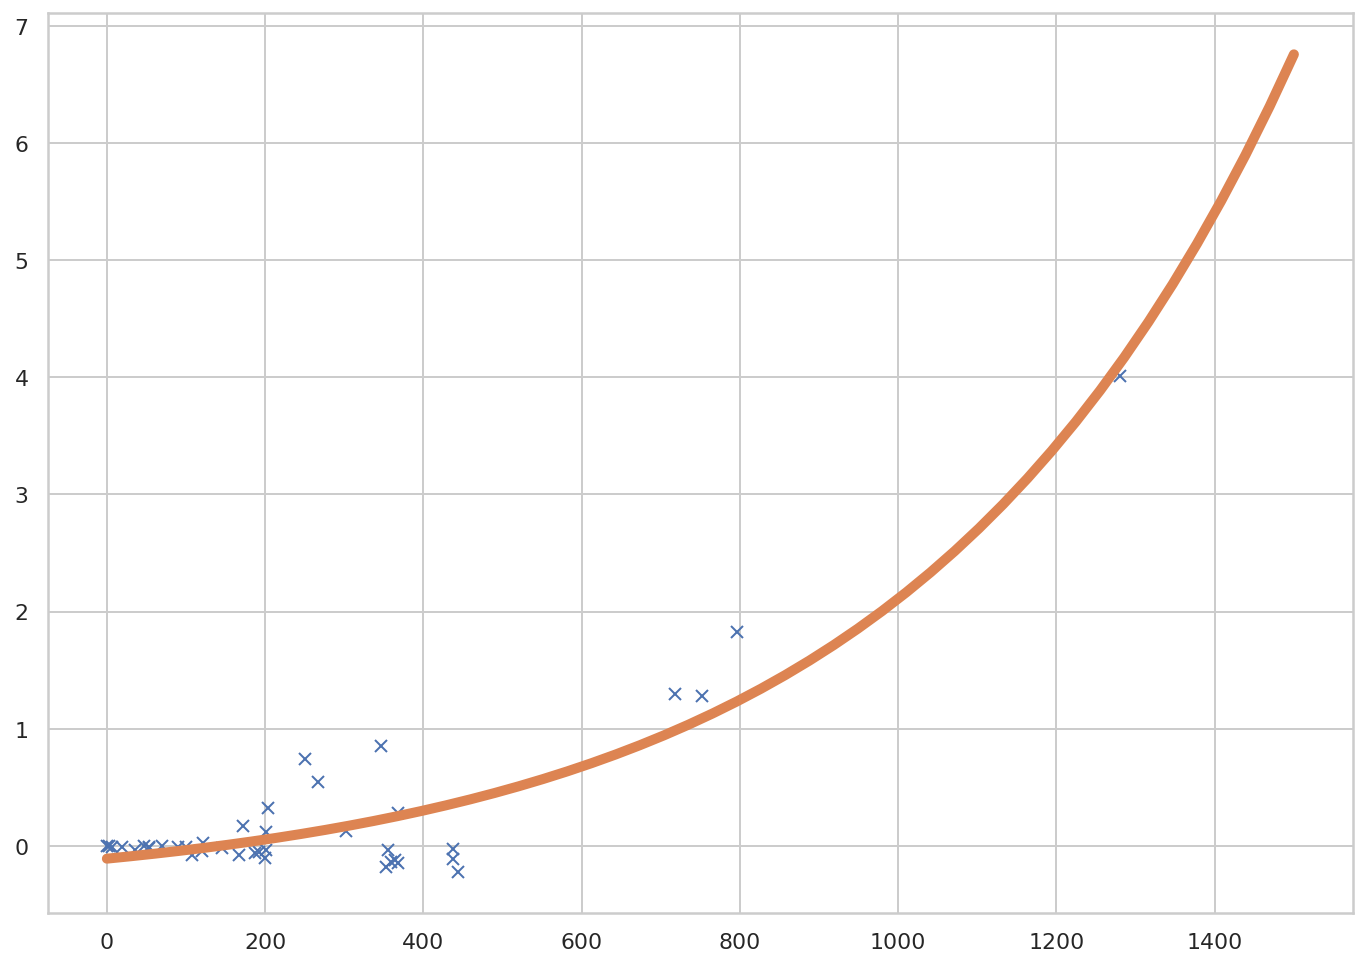

In [43]:
# PLOT
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a + b*np.exp(c*x)

x = np.array(table_merge['N0'])
y = np.array(table_merge['linear_growth_rate'])

popt, pcov = curve_fit(func, x, y, p0=[-1.5, 1.5, 0.001], maxfev=5000)

plt.plot(x, y, 'x')
xx = np.linspace(0, 1500, 50)
yy = func(xx, *popt)
plt.plot(xx, yy, lw=5)

residuals = y - func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

print(r_squared)

# Figure 5b

In [44]:
# BUILD DATA TABLE
# BETWEEN YEAR 3 AND DAY 0
# ALL TOGETHER
table_phase1_t0 = pd.read_csv('specialists_t0_combined_22040201.csv')
table_phase1_year1 = pd.read_csv('specialists_year1_combined_22040201.csv')
table_phase1_year2 = pd.read_csv('specialists_year2_combined_22040201.csv')
table_phase1_year3 = pd.read_csv('specialists_year3_combined_22040201.csv')
table_phase2_t0 = pd.read_csv('specialists_t0_combined_22032203.csv')
table_phase2_year1 = pd.read_csv('specialists_year1_combined_22032203.csv')
table_phase2_year2 = pd.read_csv('specialists_year2_combined_22032203.csv')
table_phase2_year3 = pd.read_csv('specialists_year3_combined_22032203.csv')
table_phase1_t0_Ntot0 = pd.read_csv('specialists_t0_combined_22040801.csv')
table_phase2_t0_Ntot0 = pd.read_csv('specialists_t0_combined_22040802.csv')
table_phase2_t0_2_Ntot0 = pd.read_csv('specialists_t0_combined_22040803.csv')
# PHASE 1
# RANDOM COMMUNITIES IN DESERT LITTER 
col10 = table_phase1_t0.loc[(table_phase1_t0["substrate"] == 'Protein3') & (table_phase1_t0["litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col10.set_index(['treatment_name'], inplace=True) 
col1 = col10.rename(columns={"biomass_decomp_t0": "N0"})
col20 = table_phase1_year3.loc[(table_phase1_year3["substrate"] == 'Protein3')& (table_phase1_year3["litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col20.set_index(['treatment_name'], inplace=True) 
col2 = col20.rename(columns={"biomass_specialist_year": "Nmean"})
col30 = table_phase1_t0_Ntot0.loc[(table_phase1_t0_Ntot0["substrate"] == 'Protein3') & (table_phase1_t0_Ntot0["litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col30.set_index(['treatment_name'], inplace=True) 
col3 = col30.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_1 = pd.concat([col1['N0'], col2['Nmean'], col3['Ntot0']], axis=1)
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# NO INVADERS
col40 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResD') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col40.set_index(['treatment_name'], inplace=True) 
col4 = col40.rename(columns={"biomass_decomp_t0": "N0"})
col50 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResD') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col50.set_index(['treatment_name'], inplace=True) 
col5 = col50.rename(columns={"biomass_specialist_year": "Nmean"})
col60 = table_phase2_t0_Ntot0.loc[(table_phase2_t0_Ntot0["substrate"] == 'Protein3') & (table_phase2_t0_Ntot0["residents"] == 'ResD') & (table_phase2_t0_Ntot0["invaders"] == 'NoInv') & (table_phase2_t0_Ntot0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col60.set_index(['treatment_name'], inplace=True) 
col6 = col60.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_2 = pd.concat([col4['N0'], col5['Nmean'], col6['Ntot0']], axis=1)
# PHASE 2
# PINE OAK COMMUNITIES IN DESERT LITTER
# INVADERS FROM DESERT COMMUNITIES
col70 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["invaders"] == 'InvA') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col70.set_index(['treatment_name'], inplace=True) 
col7 = col70.rename(columns={"biomass_decomp_t0": "N0"})
col80 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["invaders"] == 'InvA') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col80.set_index(['treatment_name'], inplace=True) 
col8 = col80.rename(columns={"biomass_specialist_year": "Nmean"})
col90 = table_phase2_t0_2_Ntot0.loc[(table_phase2_t0_2_Ntot0["substrate"] == 'Protein3') & (table_phase2_t0_2_Ntot0["invaders"] == 'InvA') & (table_phase2_t0_2_Ntot0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col90.set_index(['treatment_name'], inplace=True) 
col9 = col90.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_3 = pd.concat([col7['N0'], col8['Nmean'], col9['Ntot0']], axis=1)
# PHASE 2
# SCRUBLAND COMMUNITIES IN DESERT LITTER
# NO INVADERS
col100 = table_phase2_t0.loc[(table_phase2_t0["substrate"] == 'Protein3') & (table_phase2_t0["residents"] == 'ResB') & (table_phase2_t0["invaders"] == 'NoInv') & (table_phase2_t0["final_litter"] == 'A'),["biomass_decomp_t0","treatment_name"]]
col100.set_index(['treatment_name'], inplace=True) 
col10 = col100.rename(columns={"biomass_decomp_t0": "N0"})
col110 = table_phase2_year3.loc[(table_phase2_year3["substrate"] == 'Protein3') & (table_phase2_year3["residents"] == 'ResB') & (table_phase2_year3["invaders"] == 'NoInv') & (table_phase2_year3["final_litter"] == 'A'),["biomass_specialist_year","treatment_name"]]
col110.set_index(['treatment_name'], inplace=True) 
col11 = col110.rename(columns={"biomass_specialist_year": "Nmean"})
col120 = table_phase2_t0_2_Ntot0.loc[(table_phase2_t0_2_Ntot0["substrate"] == 'Protein3') & (table_phase2_t0_2_Ntot0["residents"] == 'ResB') & (table_phase2_t0_2_Ntot0["invaders"] == 'NoInv') & (table_phase2_t0_2_Ntot0["final_litter"] == 'A'),["microbe_biomass_t0","treatment_name"]]
col120.set_index(['treatment_name'], inplace=True) 
col12 = col120.rename(columns={"microbe_biomass_t0": "Ntot0"})
Table_for_plot_4 = pd.concat([col10['N0'], col11['Nmean'], col12['Ntot0']], axis=1)
# concat
table_merge = pd.concat([Table_for_plot_1,Table_for_plot_2,Table_for_plot_3,Table_for_plot_4],axis=0)
# add linear growth rate (sachant que time = 3 years = 1095 days) 
table_merge['linear_growth_rate'] = (table_merge['Nmean'] - table_merge['N0']) / 1095
table_merge['exp_growth_rate'] = np.log( table_merge['Nmean'] / table_merge['N0'] ) / 1095
table_merge['Ntot0_nonPD'] = table_merge['Ntot0'] - table_merge['N0']

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


intercept = -0.053025434658148574
slope = [3.21849478e-05]


Text(0, 0.5, 'Growth rate (linear wrt time) of protein degraders')

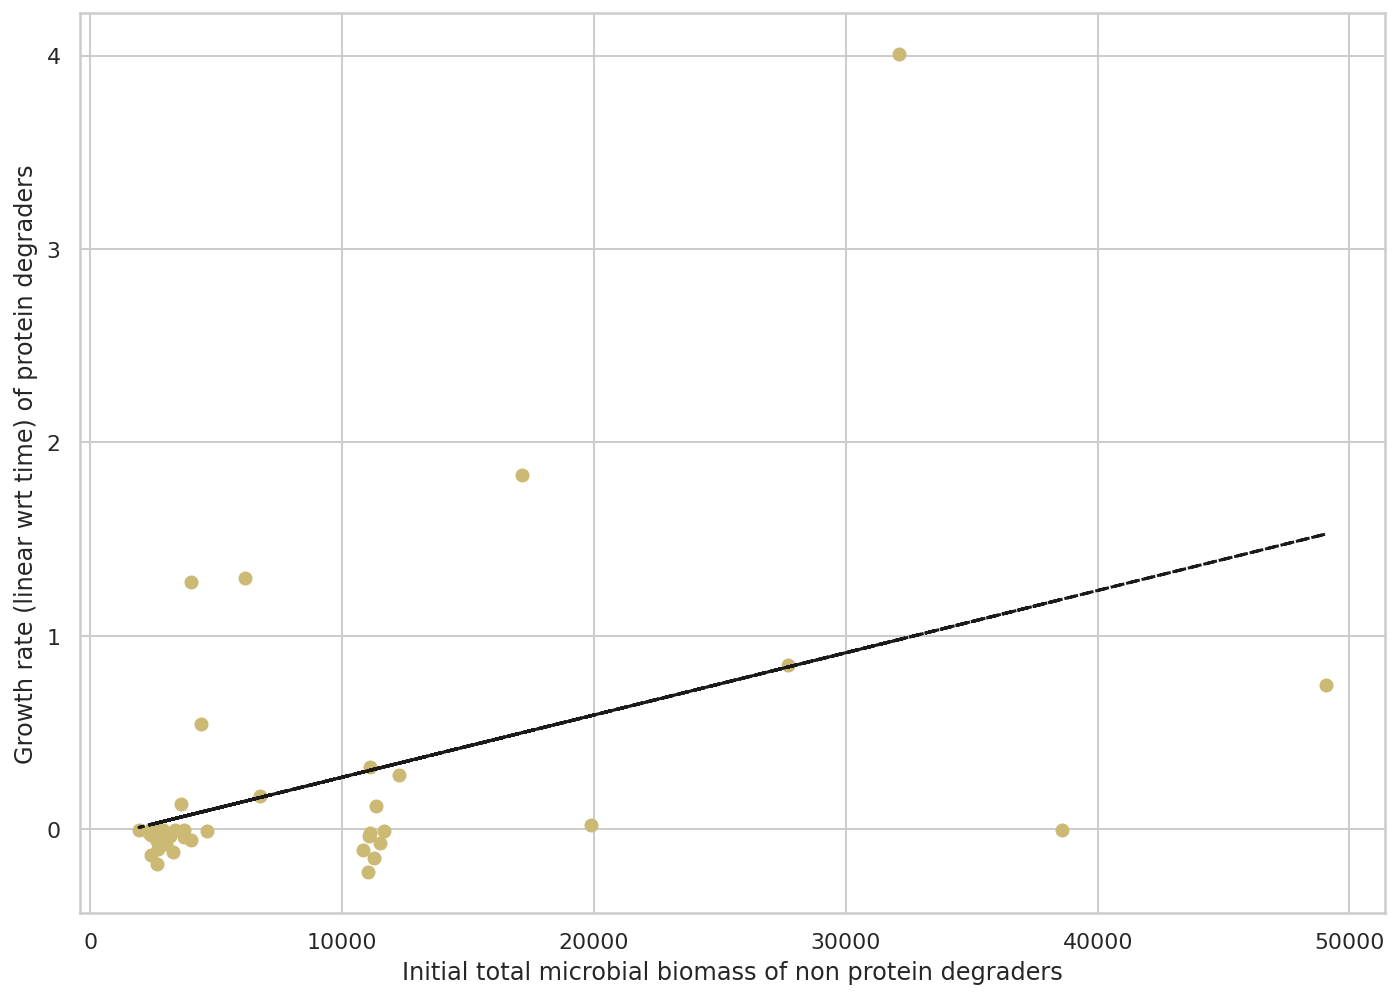

In [45]:
# PLOT
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array(table_merge['Ntot0_nonPD']).reshape(-1, 1)
y = np.array(table_merge['linear_growth_rate'])

lm = LinearRegression()
lm.fit(x, y)

print('intercept =', lm.intercept_)
print('slope =',lm.coef_)

x = np.array(table_merge['Ntot0_nonPD'])
y = np.array(table_merge['linear_growth_rate'])

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.xlabel("Initial total microbial biomass of non protein degraders")
plt.ylabel("Growth rate (linear wrt time) of protein degraders")

In [46]:
# R2
import numpy as np
import statsmodels.api as sm

x = [np.array(table_merge['Ntot0_nonPD'])]
y = np.array(table_merge['linear_growth_rate'])

def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y, x).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     9.780
Date:                Wed, 02 Nov 2022   Prob (F-statistic):            0.00338
Time:                        21:09:46   Log-Likelihood:                -40.375
No. Observations:                  40   AIC:                             84.75
Df Residuals:                      38   BIC:                             88.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.218e-05   1.03e-05      3.127      0.0

# Figure S3A

In [39]:
# BUILD DATA TABLE
# PHASE 1 AND PHASE 2
phase1 = pd.read_csv('221020_decay_results_combined.csv')
phase2 = pd.read_csv('221024_decay_results_combined.csv')
# Build dataframe
col1 = phase1.loc[phase1['litter'] == 'A']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "D-P1"})
col2 = phase1.loc[phase1['litter'] == 'B']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sc-P1"})
col3 = phase1.loc[phase1['litter'] == 'C']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "G-P1"})
col4 = phase1.loc[phase1['litter'] == 'D']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Po-P1"})
col5 = phase1.loc[phase1['litter'] == 'E']["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "Sa-P1"})
# From D to all
col6 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoD-P2"})
col7 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoSc-P2"})
col8 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoG-P2"})
col9 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoPo-P2"})
col10 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "DtoSa-P2"})
# From Sc to all
col11 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoD-P2"})
col12 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoSc-P2"})
col13 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoG-P2"})
col14 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoPo-P2"})
col15 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SctoSa-P2"})
# From G to all
col16 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoD-P2"})
col17 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoSc-P2"})
col18 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoG-P2"})
col19 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoPo-P2"})
col20 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "GtoSa-P2"})
# From Po to all
col21 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoD-P2"})
col22 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoSc-P2"})
col23 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoG-P2"})
col24 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoPo-P2"})
col25 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "PotoSa-P2"})
# From Sa to all
col26 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoD-P2"})
col27 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoSc-P2"})
col28 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoG-P2"})
col29 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoPo-P2"})
col30 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["decay_year_3"].to_frame().reset_index(drop=True).rename(columns={"decay_year_3": "SatoSa-P2"})
# Combine
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30],axis=1)
Table_for_plot

,D-P1,Sc-P1,G-P1,Po-P1,Sa-P1,DtoD-P2,DtoSc-P2,DtoG-P2,DtoPo-P2,DtoSa-P2,...,PotoD-P2,PotoSc-P2,PotoG-P2,PotoPo-P2,PotoSa-P2,SatoD-P2,SatoSc-P2,SatoG-P2,SatoPo-P2,SatoSa-P2
0,0.000443,0.000231,0.000142,0.000107,0.000071,0.000067,0.000161,0.000039,0.029354,0.000142,...,0.000059,0.000036,0.000101,0.000903,0.000055,0.021341,0.001677,0.000058,0.000037,0.000104
1,0.000038,0.004803,0.001606,0.000119,0.000520,0.009859,0.000048,0.004028,0.001693,0.000047,...,0.000055,0.010827,0.017221,0.000030,0.000085,0.001884,0.000116,0.000086,0.016612,0.024713
2,0.000083,0.000150,0.000204,0.000205,0.000064,0.001759,0.000075,0.000015,0.016550,0.015275,...,0.000013,0.000589,0.000778,0.000112,0.000026,0.009295,0.000036,0.000032,0.001990,0.002168
3,0.000133,0.002006,0.002545,0.000064,0.000118,0.021779,0.000039,0.000054,0.000040,0.001858,...,0.001003,0.000109,0.008858,0.000030,0.001066,0.000037,0.000027,0.001580,0.027604,0.015288
4,0.000100,0.000242,0.000129,0.000486,0.000120,0.000091,0.000018,0.000075,0.000133,0.026544,...,0.000032,0.018534,0.000033,0.000048,0.000029,0.000037,0.000051,0.000028,0.000103,0.000037
5,0.000213,0.000373,0.000134,0.000062,0.000212,0.000060,0.004102,0.000149,0.000021,0.000072,...,0.009262,0.000100,0.000027,0.000074,0.000117,0.000021,0.000087,0.000111,0.000073,0.000038
6,0.002247,0.000088,0.000239,0.003585,0.009267,0.003652,0.014042,0.001053,0.002044,0.000056,...,0.000094,0.000050,0.000025,0.001672,0.015260,0.001454,0.000736,0.008965,0.000063,0.000034
7,0.000133,0.000078,0.000377,0.000080,0.000256,0.000019,0.000067,0.019798,0.000035,0.002712,...,0.000031,0.000027,0.001040,0.027282,0.000034,0.000061,0.018552,0.000039,0.000034,0.001393
8,0.002560,0.000141,0.000073,0.010784,0.003714,0.000050,0.022174,0.000071,0.000063,0.000020,...,0.020876,0.001078,0.000097,0.000034,0.024223,0.000098,0.000045,0.017430,0.001076,0.000079
9,0.000229,0.000136,0.000079,0.000219,0.000087,0.000143,0.000840,0.010151,0.000057,0.000040,...,0.001507,0.000029,0.000050,0.016601,0.001726,0.000070,0.010989,0.000971,0.000035,0.000069


[(0.0, 0.0045)]

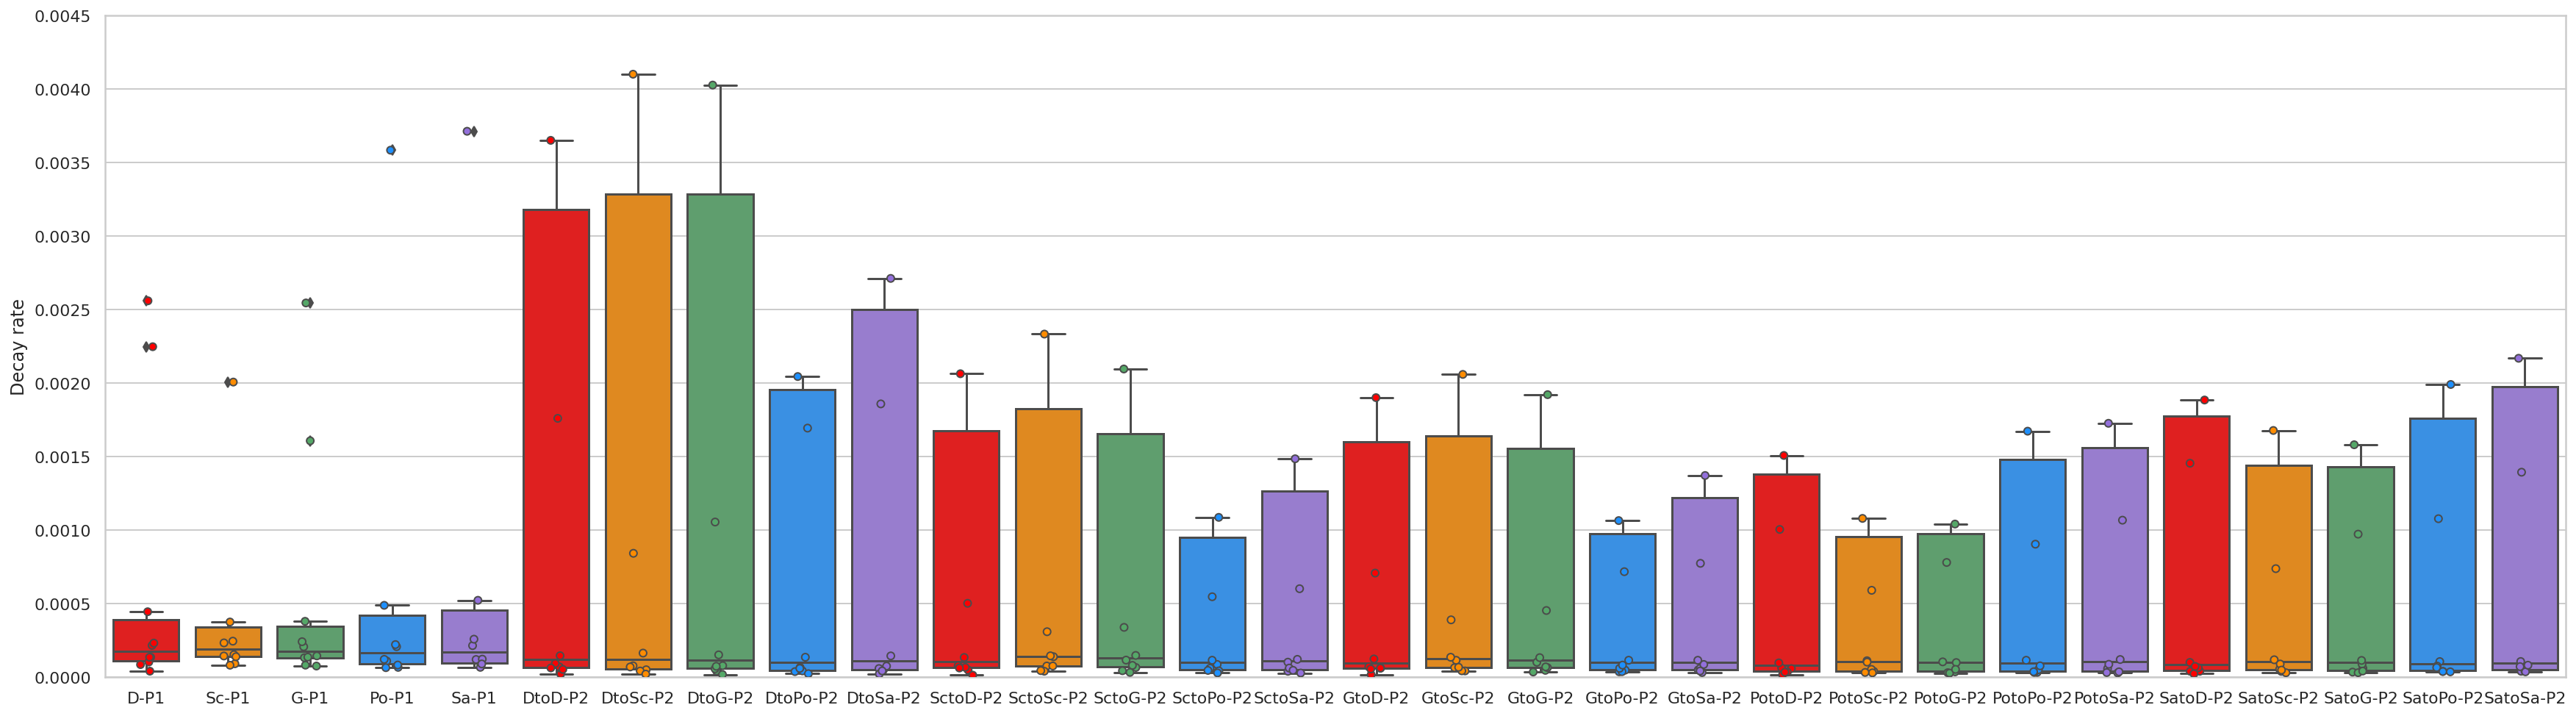

In [40]:
# BOXPLOT
import seaborn as sns
sns.set(rc={'figure.figsize':(30,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "DtoD-P2":"red", "DtoSc-P2":"darkorange", "DtoG-P2":"g", "DtoPo-P2":"dodgerblue", "DtoSa-P2":"mediumpurple",
          "SctoD-P2":"red", "SctoSc-P2":"darkorange", "SctoG-P2":"g", "SctoPo-P2":"dodgerblue", "SctoSa-P2":"mediumpurple",
          "GtoD-P2":"red", "GtoSc-P2":"darkorange", "GtoG-P2":"g", "GtoPo-P2":"dodgerblue", "GtoSa-P2":"mediumpurple",
          "PotoD-P2":"red", "PotoSc-P2":"darkorange", "PotoG-P2":"g", "PotoPo-P2":"dodgerblue", "PotoSa-P2":"mediumpurple",
          "SatoD-P2":"red", "SatoSc-P2":"darkorange", "SatoG-P2":"g", "SatoPo-P2":"dodgerblue", "SatoSa-P2":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
ax.set_ylabel('Decay rate')
ax.set_xlabel('')
ax.set(ylim=(0, 0.0045))

In [41]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col3,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col28,col29,col30],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "decay"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[6]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('decay ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

             sum_sq    df         F    PR(>F)
treatment  0.000063   1.0  2.080218  0.166394
Residual   0.000542  18.0       NaN       NaN


# Figure S3B

In [50]:
# BUILD DATA TABLE
# PHASE 1 AND PHASE 2
phase1 = pd.read_csv('221020_decay_results_combined.csv')
phase2 = pd.read_csv('221024_decay_results_combined.csv')
# Build dataframe
col1 = phase1.loc[phase1['litter'] == 'A']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "D-P1"})
col2 = phase1.loc[phase1['litter'] == 'B']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "Sc-P1"})
col3 = phase1.loc[phase1['litter'] == 'C']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "G-P1"})
col4 = phase1.loc[phase1['litter'] == 'D']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "Po-P1"})
col5 = phase1.loc[phase1['litter'] == 'E']["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "Sa-P1"})
# From D to all
col6 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "DtoD-P2"})
col7 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "DtoSc-P2"})
col8 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "DtoG-P2"})
col9 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "DtoPo-P2"})
col10 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResA') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "DtoSa-P2"})
# From Sc to all
col11 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SctoD-P2"})
col12 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SctoSc-P2"})
col13 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SctoG-P2"})
col14 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SctoPo-P2"})
col15 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResB') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SctoSa-P2"})
# From G to all
col16 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "GtoD-P2"})
col17 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "GtoSc-P2"})
col18 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "GtoG-P2"})
col19 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "GtoPo-P2"})
col20 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResC') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "GtoSa-P2"})
# From Po to all
col21 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "PotoD-P2"})
col22 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "PotoSc-P2"})
col23 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "PotoG-P2"})
col24 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "PotoPo-P2"})
col25 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResD') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "PotoSa-P2"})
# From Sa to all
col26 = phase2.loc[(phase2["final_litter"] == 'A') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SatoD-P2"})
col27 = phase2.loc[(phase2["final_litter"] == 'B') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SatoSc-P2"})
col28 = phase2.loc[(phase2["final_litter"] == 'C') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SatoG-P2"})
col29 = phase2.loc[(phase2["final_litter"] == 'D') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SatoPo-P2"})
col30 = phase2.loc[(phase2["final_litter"] == 'E') & (phase2["residents"] == 'ResE') & (phase2["invaders"] == 'NoInv')]["biomass_year_3"].to_frame().reset_index(drop=True).rename(columns={"biomass_year_3": "SatoSa-P2"})
# Combine
Table_for_plot = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30],axis=1)
Table_for_plot

,D-P1,Sc-P1,G-P1,Po-P1,Sa-P1,DtoD-P2,DtoSc-P2,DtoG-P2,DtoPo-P2,DtoSa-P2,...,PotoD-P2,PotoSc-P2,PotoG-P2,PotoPo-P2,PotoSa-P2,SatoD-P2,SatoSc-P2,SatoG-P2,SatoPo-P2,SatoSa-P2
0,4625.574444,3594.734264,2811.864912,2641.619906,2655.603544,923.967845,1535.934789,1070.304918,192662.632239,1358.363293,...,1016.169635,607.429199,1072.959956,3569.253302,909.209081,156024.507582,5462.742913,931.473523,594.470519,1015.515987
1,2301.507165,28113.167426,11298.604946,2926.410678,4330.419648,102994.949415,887.985227,12163.041347,15200.846418,726.293493,...,881.140367,87510.936142,127779.069516,763.435118,1113.048972,16471.525147,1104.023072,1272.289121,119064.589142,187517.835623
2,2888.473787,2957.264047,3536.332279,2980.717831,2605.631690,16033.527676,1123.284152,692.607401,118484.508722,120236.644947,...,679.221533,5999.977649,7811.704828,1108.979424,755.559649,94172.070775,907.005882,929.086130,17131.193432,18455.251994
3,2977.321318,13071.378168,17012.513882,2498.222805,2740.722448,160839.193612,1138.276124,869.254466,632.943074,16421.861829,...,4767.207172,1060.081863,83040.538542,876.939368,3941.865783,580.341329,1033.537221,5441.123159,189339.557408,120973.252530
4,2642.075848,3279.168578,2682.721106,4225.309682,2957.799131,1392.629229,711.647925,1116.146569,1241.322647,194421.200612,...,967.203408,140099.755128,584.115999,881.079348,932.760169,1050.964106,842.250334,1002.445091,983.423898,587.774421
5,4108.317153,4147.506991,3032.905295,2672.204632,2933.412925,864.839068,11817.507894,1510.239879,662.024148,1154.808823,...,93392.926997,1331.770450,988.119561,1097.980657,1120.205047,788.878511,1240.210262,1139.243534,1070.466445,1008.455903
6,15480.674579,2551.514218,3326.683291,18976.618866,52527.938734,14448.098999,134294.165866,10404.393751,6675.537868,890.720880,...,1168.789302,825.873677,804.994512,14748.314852,120007.929473,6386.161820,7084.305040,84434.016641,1055.553364,898.186146
7,2741.864773,2880.978691,3982.454428,2148.583016,4368.038912,722.930899,938.038282,147052.328140,969.860633,8439.154730,...,531.281675,975.489901,3979.239252,187340.230260,570.179360,927.382601,140299.807661,618.388951,958.811770,4841.173948
8,16506.609033,2755.537851,2548.411847,53473.485303,19855.456999,1211.281556,165360.440984,958.418361,1040.932847,673.428389,...,152660.479759,3912.912606,1261.280978,578.000972,185056.117432,1157.577849,675.436809,129628.753046,3950.977897,1066.187078
9,3483.361236,3028.521955,2857.254728,4066.723230,2283.679777,1615.644435,8325.781926,104517.668254,856.935247,1062.860616,...,13587.934161,774.831878,836.647298,118866.845685,15186.832468,1129.096854,89330.424083,9274.471639,903.343944,1066.371563


[(0.0, 19000.0)]

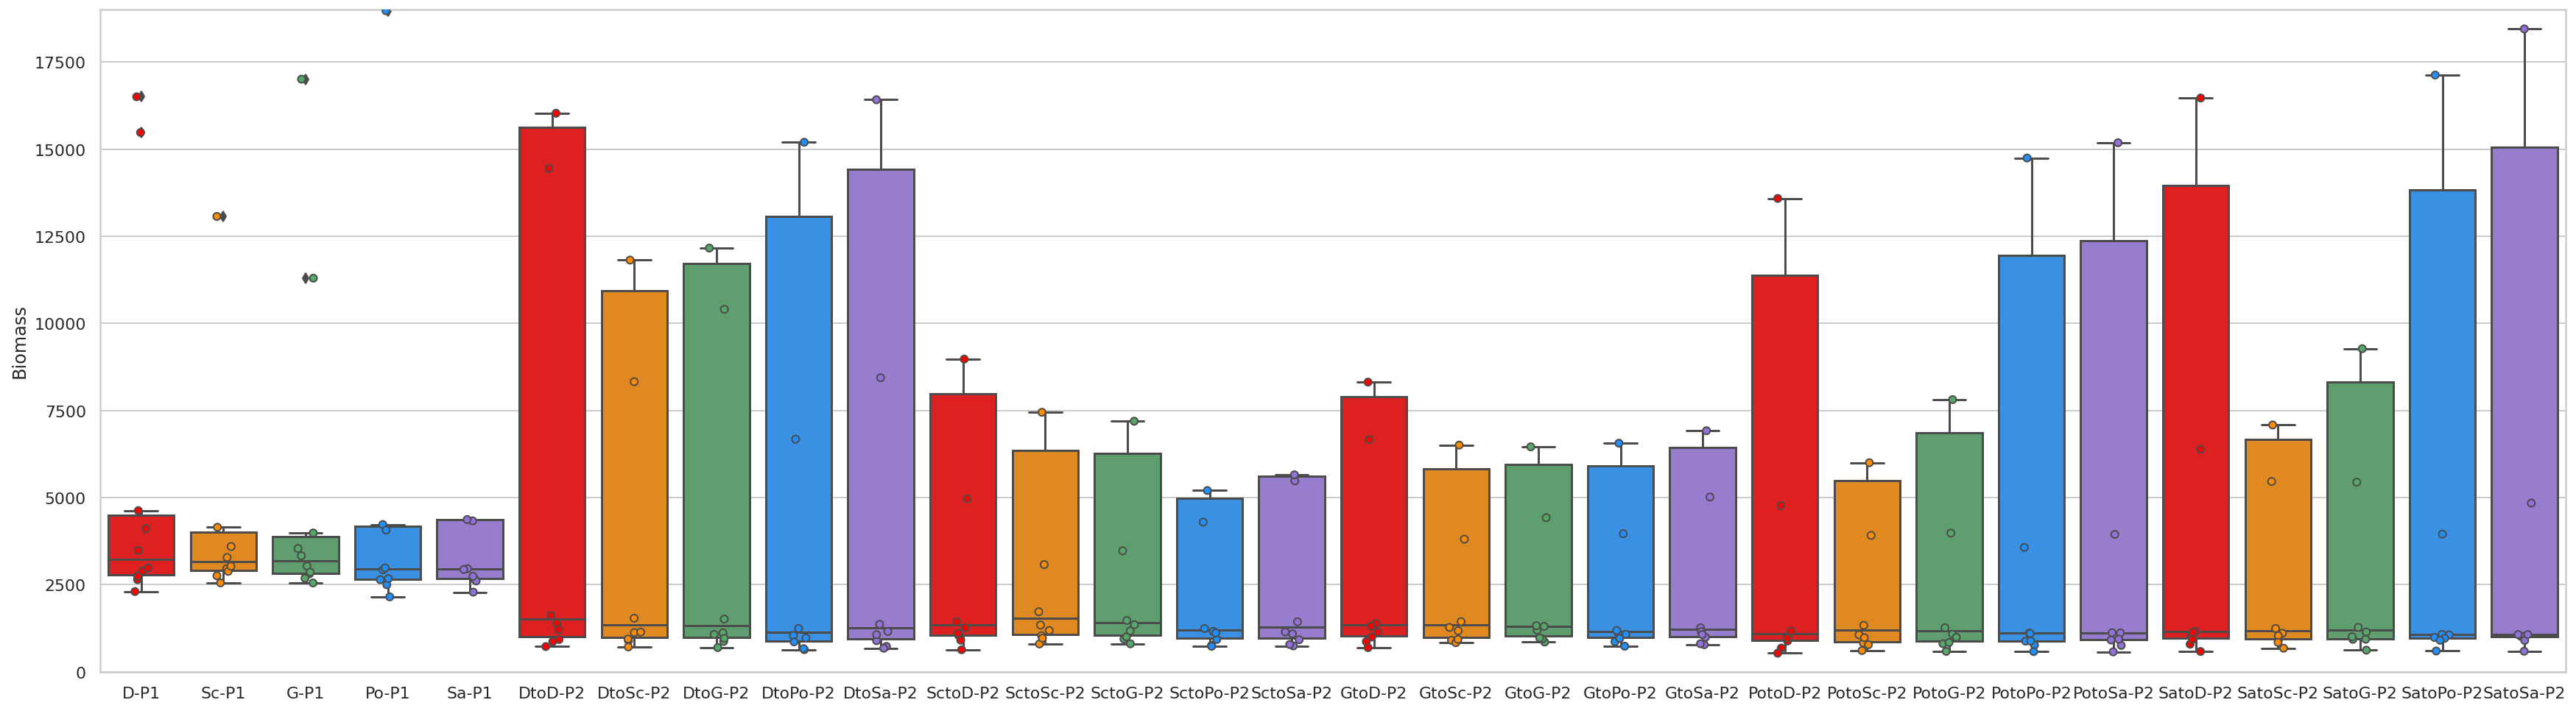

In [51]:
# BOXPLOT
import seaborn as sns
sns.set(rc={'figure.figsize':(30,8.27)})
sns.set_style("whitegrid")

my_pal = {"D-P1":"red", "Sc-P1":"darkorange", "G-P1":"g", "Po-P1":"dodgerblue", "Sa-P1":"mediumpurple",
          "DtoD-P2":"red", "DtoSc-P2":"darkorange", "DtoG-P2":"g", "DtoPo-P2":"dodgerblue", "DtoSa-P2":"mediumpurple",
          "SctoD-P2":"red", "SctoSc-P2":"darkorange", "SctoG-P2":"g", "SctoPo-P2":"dodgerblue", "SctoSa-P2":"mediumpurple",
          "GtoD-P2":"red", "GtoSc-P2":"darkorange", "GtoG-P2":"g", "GtoPo-P2":"dodgerblue", "GtoSa-P2":"mediumpurple",
          "PotoD-P2":"red", "PotoSc-P2":"darkorange", "PotoG-P2":"g", "PotoPo-P2":"dodgerblue", "PotoSa-P2":"mediumpurple",
          "SatoD-P2":"red", "SatoSc-P2":"darkorange", "SatoG-P2":"g", "SatoPo-P2":"dodgerblue", "SatoSa-P2":"mediumpurple"}

ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax = sns.stripplot(x="variable", y="value", data=pd.melt(Table_for_plot), linewidth=1, palette=my_pal)
ax.set_ylabel('Biomass')
ax.set_xlabel('')
ax.set(ylim=(0, 19000))

In [ ]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col3,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col28,col29,col30],axis=1)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "biomass"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['treatment'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['seed'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[13]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('biomass ~ treatment', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)